In [289]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [290]:
csv_link="../dataset/percobaan.csv"

In [291]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [292]:
dataframe.head()

,Skintone,Season,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,white,spring,239,124,142,250,232,224,182,226,211,216,167,177
1,white,summer,232,180,184,238,214,211,164,147,147,103,89,94
2,white,spring,251,231,198,180,248,200,160,231,229,255,174,188
3,white,summer,5,68,94,24,154,180,117,230,218,212,241,244
4,white,summer,231,210,204,185,183,189,134,139,142,238,237,231


In [293]:
dataframe = pd.get_dummies(dataframe, columns=['Skintone', 'Season'])
dataframe

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
0,239,124,142,250,232,224,182,226,211,216,167,177,False,False,True,False,True,False,False
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
2,251,231,198,180,248,200,160,231,229,255,174,188,False,False,True,False,True,False,False
3,5,68,94,24,154,180,117,230,218,212,241,244,False,False,True,False,False,True,False
4,231,210,204,185,183,189,134,139,142,238,237,231,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,252,139,192,250,83,160,37,192,192,243,188,80,False,False,True,True,False,False,False
116,239,211,181,95,9,61,178,19,104,214,123,168,False,False,True,False,True,False,False
117,84,98,123,236,213,187,255,255,255,113,1,23,False,False,True,True,False,False,False
118,146,44,64,220,151,80,243,234,192,30,38,64,False,False,True,False,True,False,False


In [294]:
train_dataset = dataframe.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataframe.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
104,230,194,191,248,239,228,250,208,44,40,33,32,False,False,True,False,True,False,False
3,5,68,94,24,154,180,117,230,218,212,241,244,False,False,True,False,False,True,False
28,248,234,140,164,232,224,76,215,208,225,195,64,False,False,True,False,False,True,False
72,248,192,200,239,231,211,211,187,221,236,227,240,False,False,True,False,False,False,True
10,246,238,224,228,183,160,164,92,64,195,131,112,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,185,144,149,252,181,172,181,229,207,61,91,89,False,False,True,False,True,False,False
94,231,98,95,200,82,80,247,190,192,233,234,224,True,False,False,True,False,False,False
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
100,255,92,77,255,150,54,255,205,88,218,216,112,False,True,False,False,False,True,False


In [295]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
0,239,124,142,250,232,224,182,226,211,216,167,177,False,False,True,False,True,False,False
12,65,114,159,88,133,175,39,68,114,195,224,229,False,False,True,False,False,False,True
18,212,140,112,244,185,184,235,187,176,233,137,128,True,False,False,False,True,False,False
22,239,235,224,251,141,160,251,107,144,251,69,112,True,False,False,False,True,False,False
33,183,172,68,223,54,45,255,131,0,255,69,0,False,True,False,True,False,False,False
40,239,124,142,250,232,224,182,226,211,216,167,177,False,True,False,True,False,False,False
52,65,114,159,88,133,175,39,68,114,195,224,229,False,False,True,False,False,True,False
54,188,236,224,54,238,224,246,82,160,76,82,112,False,True,False,True,False,False,False
56,255,194,199,182,229,216,251,229,200,143,221,231,False,False,True,True,False,False,False
59,255,244,189,244,185,184,133,210,208,136,123,176,True,False,False,False,False,True,False


In [296]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
train_labels

,Skintone_white,Skintone_olive,Skintone_darkbrown,Season_summer,Season_winter,Season_autumn,Season_spring
104,True,False,False,False,False,False,True
3,True,False,False,True,False,False,False
28,True,False,False,True,False,False,False
72,True,False,False,False,True,False,False
10,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
11,True,False,False,False,False,False,True
94,False,False,True,False,False,True,False
1,True,False,False,True,False,False,False
100,False,True,False,True,False,False,False


In [297]:
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
104,230,194,191,248,239,228,250,208,44,40,33,32
3,5,68,94,24,154,180,117,230,218,212,241,244
28,248,234,140,164,232,224,76,215,208,225,195,64
72,248,192,200,239,231,211,211,187,221,236,227,240
10,246,238,224,228,183,160,164,92,64,195,131,112
...,...,...,...,...,...,...,...,...,...,...,...,...
11,185,144,149,252,181,172,181,229,207,61,91,89
94,231,98,95,200,82,80,247,190,192,233,234,224
1,232,180,184,238,214,211,164,147,147,103,89,94
100,255,92,77,255,150,54,255,205,88,218,216,112


In [298]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
test_labels

,Skintone_white,Skintone_olive,Skintone_darkbrown,Season_summer,Season_winter,Season_autumn,Season_spring
0,True,False,False,False,False,False,True
12,True,False,False,False,True,False,False
18,False,False,True,False,False,False,True
22,False,False,True,False,False,False,True
33,False,True,False,False,False,True,False
40,False,True,False,False,False,True,False
52,True,False,False,True,False,False,False
54,False,True,False,False,False,True,False
56,True,False,False,False,False,True,False
59,False,False,True,True,False,False,False


In [299]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,239,124,142,250,232,224,182,226,211,216,167,177
12,65,114,159,88,133,175,39,68,114,195,224,229
18,212,140,112,244,185,184,235,187,176,233,137,128
22,239,235,224,251,141,160,251,107,144,251,69,112
33,183,172,68,223,54,45,255,131,0,255,69,0
40,239,124,142,250,232,224,182,226,211,216,167,177
52,65,114,159,88,133,175,39,68,114,195,224,229
54,188,236,224,54,238,224,246,82,160,76,82,112
56,255,194,199,182,229,216,251,229,200,143,221,231
59,255,244,189,244,185,184,133,210,208,136,123,176


In [300]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataset=scaler.fit_transform(train_dataset)
test_dataset=scaler.fit_transform(test_dataset)

In [301]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(32, input_shape=(12,), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(7, activation='sigmoid')
  ])

In [302]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [303]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 32)                416       
                                                                 
 dense_64 (Dense)            (None, 24)                792       
                                                                 
 dense_65 (Dense)            (None, 24)                600       
                                                                 
 dense_66 (Dense)            (None, 16)                400       
                                                                 
 dense_67 (Dense)            (None, 512)               8704      
                                                                 
 dense_68 (Dense)            (None, 512)               262656    
                                                                 
 dense_69 (Dense)            (None, 512)              

In [304]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [305]:

history = model.fit(x=train_dataset, y=train_labels, 
                        validation_split=0.3, 
                        epochs=300, 
                        batch_size=24, 
                        verbose=1,
                        callbacks=[tfdocs.modeling.EpochDots()], 
                        shuffle=True)

Epoch 1/300


3/3 [==============================] - ETA: 0s - loss: 7.2690 - accuracy: 0.0000e+00
Epoch: 0, accuracy:0.0000,  loss:7.2690,  val_accuracy:0.0000,  val_loss:6.7543,  
3/3 [==============================] - 3s 211ms/step - loss: 7.2690 - accuracy: 0.0000e+00 - val_loss: 6.7543 - val_accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 79ms/step - loss: 6.5346 - accuracy: 0.0000e+00 - val_loss: 6.0523 - val_accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 80ms/step - loss: 5.8483 - accuracy: 0.0000e+00 - val_loss: 5.3894 - val_accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 70ms/step - loss: 5.1892 - accuracy: 0.0000e+00 - val_loss: 4.8326 - val_accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 68ms/step - loss: 4.6634 - accuracy: 0.0000e+00 - val_loss: 4.2998 - val_accuracy: 0.4483
Epoch 6/300
3/3 [==============================] - 0s 76ms/step - loss: 4.1621 - accuracy: 0.4925 - val_los

In [ ]:
# history=train()

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
295,0.515518,0.507463,0.695925,0.344828,295
296,0.516790,0.597015,0.698040,0.344828,296
297,0.516944,0.537313,0.699307,0.310345,297
298,0.515990,0.522388,0.698479,0.344828,298
299,0.515385,0.552239,0.699103,0.310345,299


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

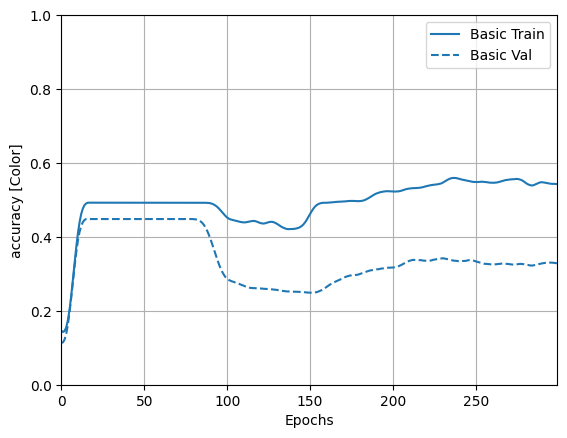

In [ ]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

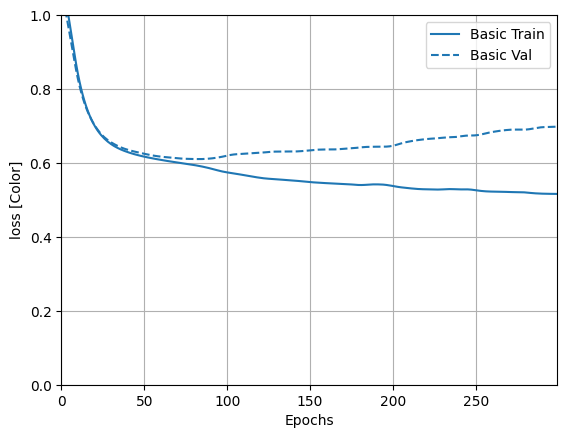

In [ ]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [ ]:
model.evaluate(x=train_dataset, y=train_labels)

3/3 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.4479


[0.5704135298728943, 0.4479166567325592]

In [ ]:
model.evaluate(x=test_dataset, y=test_labels)

1/1 [==============================] - 0s 28ms/step - loss: 0.7711 - accuracy: 0.3750


[0.7711247801780701, 0.375]

In [ ]:
data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)
predictions = model.predict(data)
predictions= predictions
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 88ms/step
[[0.02398548 0.19512856 0.83090025 0.17403376 0.52467567 0.03830414
  0.1885785 ]]


In [ ]:
# model.save("tone_prediction", save_format='h5')
# model.save("tone_prediction.h5")


In [ ]:
reconstructed_model = keras.models.load_model("tone_prediction.h5")

In [ ]:
reconstructed_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
 dense_2 (Dense)             (None, 24)                96        
                                                                 
 dense_3 (Dense)             (None, 32)                800       
                                                                 
 dense_4 (Dense)             (None, 24)                792       
                                                                 
 dense_5 (Dense)             (None, 16)                400       
                                                                 
 dense_6 (Dense)             (None, 7)                

In [ ]:
# data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
# predictions = reconstructed_model.predict(data)
# predictions= predictions*100
# # Print the predictions
# print(predictions)

In [ ]:
# reconstructed_model = keras.models.load_model("tone_prediction.h5")
# reversed_layers = list(reversed(reconstructed_model.layers))
# reversed_model = tf.keras.models.Sequential(reversed_layers)


In [ ]:
# data=np.array([[0.08542435, 0.00977156, 0.01834051, 0.02325298, 0.01231119, 0.0082467, 0.02043331]])
# predictions=reversed_model.predict(data)
# print(predictions)

In [ ]:
#plt.imshow([[[x / 255 for x in test_input[0]]]])
#plt.show()

# plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
# plt.show()